观测值:
[ 6.1180801  11.45790488  3.52758314  5.06061096  8.27789378 12.08659574
  6.60552265  7.31773867  6.52958767  1.63817821]

均值参数:
[7.         7.11111111 7.22222222 7.33333333 7.44444444 7.55555556
 7.66666667 7.77777778 7.88888889 8.        ]

尺度参数:
[4.48168907 4.73771786 5.008373   5.29449005 5.59695233 5.91669359
 6.25470095 6.61201791 6.98974758 7.3890561 ]

形状1参数:
0

形状2参数:
1

随机效应:
[ 0.39263284  0.18183375 -0.6654733  -0.53998937 -0.20619816 -0.00267377
 -1.39376618  0.65923036 -0.33702342 -1.21294842]


/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipykernel_73405/3879404941.py:63: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipykernel_73405/3879404941.py:63: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  plt.tight_layout()
/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipykernel_73405/3879404941.py:63: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  plt.tight_layout()
/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipykernel_73405/3879404941.py:63: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  plt.tight_layout()
/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipykernel_73405/3879404941.py:63: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.tight_layout()
/var/folders/3v/3zvgxtgj0c18q0snf15v3prc0000gn/T/ipyker

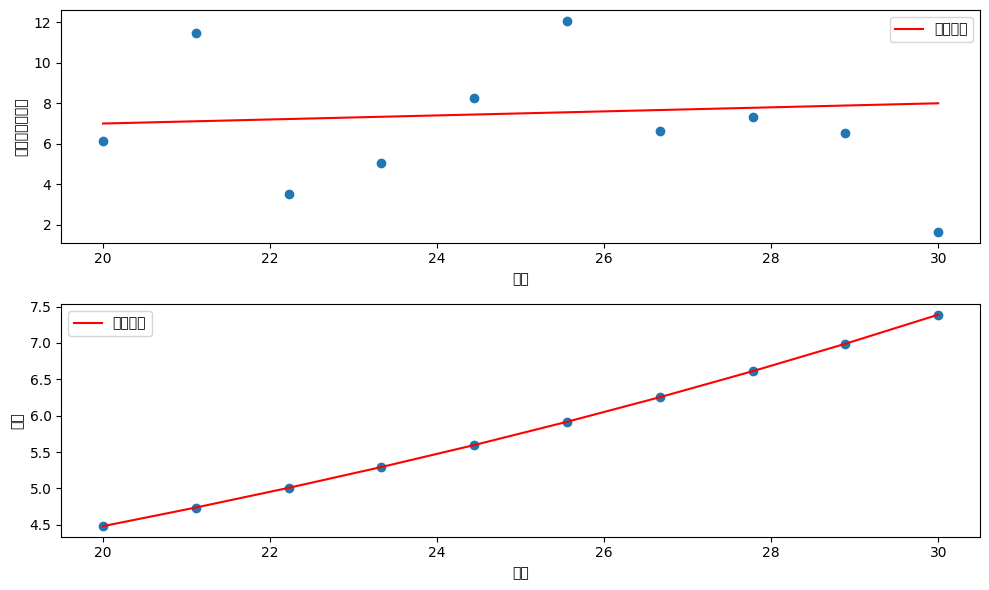

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 定义模型参数
n = 10  # 观测值个数
beta0 = 5  # 均值截距
beta1 = 0.1  # 均值斜率
gamma0 = 0.5  # 尺度截距
gamma1 = 0.05  # 尺度斜率
nu = 0  # 形状1参数
tau = 1  # 形状2参数
G_inv = 1  # 随机效应协方差矩阵的逆

# 2. 生成自变量和随机效应
age = np.linspace(20, 30, n)
random_effect = np.random.normal(0, np.sqrt(G_inv), n)

# 3. 计算模型参数
mu = beta0 + beta1 * age
log_sigma = gamma0 + gamma1 * age

# 4. 生成响应变量
y = norm.rvs(loc=mu, scale=np.exp(log_sigma), size=n)

# 5. 构建设计矩阵
X = np.column_stack((np.ones(n), age))
Z = np.ones(n)

# 6. 计算变换后的参数
eta3 = np.dot(X, [beta0, beta1]) + np.dot(Z, random_effect)
eta4 = np.dot(X, [gamma0, gamma1]) + np.dot(Z, random_effect)

# 7. 打印结果
print("观测值:")
print(y)
print("\n均值参数:")
print(mu)
print("\n尺度参数:")
print(np.exp(log_sigma))
print("\n形状1参数:")
print(nu)
print("\n形状2参数:")
print(tau)
print("\n随机效应:")
print(random_effect)

# 8. 绘制结果
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.scatter(age, y)
plt.plot(age, mu, 'r-', label='预测均值')
plt.xlabel('年龄')
plt.ylabel('生物标志物水平')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(age, np.exp(log_sigma))
plt.plot(age, np.exp(log_sigma), 'r-', label='预测尺度')
plt.xlabel('年龄')
plt.ylabel('尺度')
plt.legend()
plt.tight_layout()
plt.show()